In [1]:
# utilities
import re
import numpy as np
import pandas as pd
import string
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load the data
df=pd.read_csv("twitter_new.csv",sep = ',',encoding='latin-1')
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
# Understand the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [4]:
# Unique Target Values
df['target'].value_counts()

0    800000
4    800000
Name: target, dtype: int64

In [5]:
# Take the Text & Target for further analysis
data=df[['text','target']]
# Replace 4 as 1 for better understanding
data['target'] = data['target'].replace(4,1)

C:\Users\sampathkumar.g\AppData\Local\Temp\ipykernel_24472\2635577561.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [6]:
# Unique Target Values
data['target'].value_counts()

0    800000
1    800000
Name: target, dtype: int64

In [7]:
# Function to Check the Performance of the model
def model_performance(mdl, clasfr,test, pred):
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
    result = confusion_matrix(test, pred)
    print("Confusion Matrix:")
    print(result)
    result1 = classification_report(test, pred)
    print("Classification Report:",)
    print (result1)
    result2 = accuracy_score(test,pred)
    print("Accuracy:",result2)
    result3 = f1_score(test,pred)
    print("F1:",result3)
    result4 = precision_score(test,pred)
    print("Precision:",result4)
    result5 = recall_score(test,pred)
    print("Recall:",result5)
    print("ROC Curve:")
    if mdl != "LinearSVC":
        from sklearn.metrics import roc_curve
        pred_prob=clasfr.predict_proba(X_test)
        fpr,tpr,thresh=roc_curve(y_test,pred_prob[:,1],pos_label=1)
        plt.plot(fpr,tpr)

In [8]:
# Create small data set for testing the vectors
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]
data_pos = data_pos.iloc[:int(50000)]
data_neg = data_neg.iloc[:int(50000)]
dataset = pd.concat([data_pos, data_neg])

In [9]:
# convert all text to lowercase
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

49995    @mileycyrus so i have the same insomnia prob a...
49996    20 mintues late for my meeting starting @ 8  h...
49997    @kentucky_derby super excited! are you tweetin...
49998    i want another day off!!!!  to much sh#t to do...
49999                 i just jacked up this umbrella cake 
Name: text, dtype: object

In [10]:
# Creating Independent & Dependent Features from the small sample
X=dataset.text
y=dataset.target

In [11]:
# Creating a vector using Count Vectorization
vectorizer = CountVectorizer(ngram_range = (1,3))
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
vectorizer = CountVectorizer(stop_words='english',ngram_range = (1,3),tokenizer = token.tokenize)
text_counts = vectorizer.fit_transform(X)

In [12]:
# Creating training & testing data
X_train, X_test, y_train, y_test = train_test_split(text_counts, y, test_size=0.25, random_state=5)

In [13]:
# Build Models using Logistic Regression Algorithm
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
y_pred = LRmodel.predict(X_test)

Confusion Matrix:
[[9325 3103]
 [2769 9803]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76     12428
           1       0.76      0.78      0.77     12572

    accuracy                           0.77     25000
   macro avg       0.77      0.77      0.77     25000
weighted avg       0.77      0.77      0.77     25000

Accuracy: 0.76512
F1: 0.7695266504435199
Precision: 0.7595691926235859
Recall: 0.7797486477887369
ROC Curve:


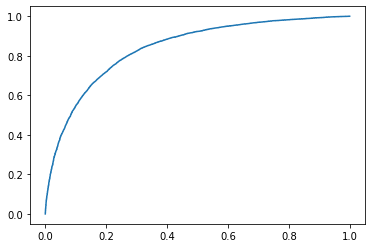

In [14]:
# Checking the performance of the Logistic Regression model built using Count Vectorization
model_performance("LR", LRmodel, y_test, y_pred)

In [15]:
# Creating training & testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [16]:
# Creating a vector using TF-IDF Vectorization
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=20000)
vectoriser.fit(X_train)
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [17]:
# Build Models using Logistic Regression Algorithm
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
y_pred = LRmodel.predict(X_test)

Confusion Matrix:
[[1953  559]
 [ 473 2015]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      2512
           1       0.78      0.81      0.80      2488

    accuracy                           0.79      5000
   macro avg       0.79      0.79      0.79      5000
weighted avg       0.79      0.79      0.79      5000

Accuracy: 0.7936
F1: 0.7961280126432241
Precision: 0.7828282828282829
Recall: 0.809887459807074
ROC Curve:


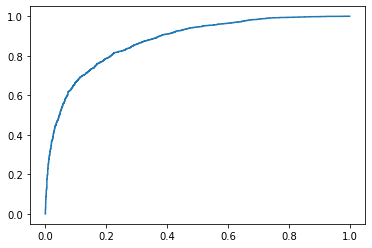

In [18]:
# Checking the Performance of the Logistic Regression model built using TF-IDF Vectorization
model_performance("LR",LRmodel,y_test, y_pred)

In [ ]:
# Model built using TF-IDF Vectorization gives better accuracy than Count Vectorization for the same algorithm
# Hence we will build models using TF-IDF Vectorization

In [19]:
# Build Models using Bernoulli Naive Bayes Classifier Algorithm
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
y_pred = BNBmodel.predict(X_test)

Confusion Matrix:
[[1893  619]
 [ 504 1984]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      2512
           1       0.76      0.80      0.78      2488

    accuracy                           0.78      5000
   macro avg       0.78      0.78      0.78      5000
weighted avg       0.78      0.78      0.78      5000

Accuracy: 0.7754
F1: 0.7794146533097622
Precision: 0.7621974644640799
Recall: 0.797427652733119
ROC Curve:


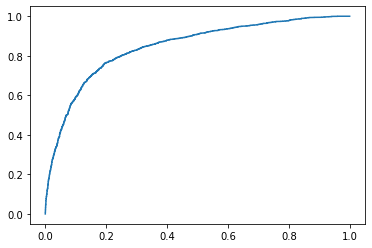

In [20]:
# Checking the Performance of the Bernoulli Naive Bayes model built using TF-IDF Vectorization
model_performance("NavieBayes",BNBmodel, y_test, y_pred)

In [21]:
# Build Models using SVM Classifier Algorithm
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
y_pred = SVCmodel.predict(X_test)

In [22]:
# Checking the Performance of the SVM model built using TF-IDF Vectorization
model_performance("LinearSVC",SVCmodel, y_test, y_pred)

Confusion Matrix:
[[1922  590]
 [ 499 1989]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      2512
           1       0.77      0.80      0.79      2488

    accuracy                           0.78      5000
   macro avg       0.78      0.78      0.78      5000
weighted avg       0.78      0.78      0.78      5000

Accuracy: 0.7822
F1: 0.7850799289520426
Precision: 0.7712291585886002
Recall: 0.7994372990353698
ROC Curve:


In [23]:
# Build Models using Decision Tree Classifier Algorithm
DecisionTree=DecisionTreeClassifier()
DecisionTree.fit(X_train, y_train)
y_pred = DecisionTree.predict(X_test)

Confusion Matrix:
[[1724  788]
 [ 758 1730]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      2512
           1       0.69      0.70      0.69      2488

    accuracy                           0.69      5000
   macro avg       0.69      0.69      0.69      5000
weighted avg       0.69      0.69      0.69      5000

Accuracy: 0.6908
F1: 0.6911705952856573
Precision: 0.687053216838761
Recall: 0.6953376205787781
ROC Curve:


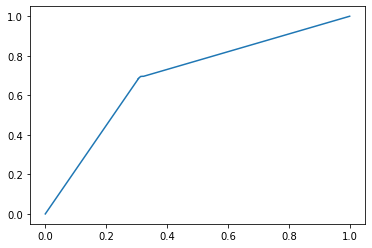

In [24]:
# Checking the Performance of the Decision Tree model built using TF-IDF Vectorization
model_performance("DecisionTree",DecisionTree, y_test, y_pred)

In [ ]:
# From the above it can be found that Logistics Regression build using TF-IDF Vectorization gives a better prediction